# Synthetic data results

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def plot_res(plot_dic):
    os.chdir(plot_dic)
    #----- customise ----- #
    axis_font = {'fontname':'serif','fontweight':'bold', 'fontsize':10} #Times New Roman
    titie_font = {'fontname':'serif', 'fontsize':16}
    
    methods = ['baseline', 'sliding', 'oob_single', 'oob', 'areba', 'mine'] 
    methods_name = ['Baseline', 'Sliding', 'OOB_single', 'OOB_30', 'AREBA', 'OB-awKDE'] 
    colours = ['#5EBD3E','#FFB900','#F78200','#E23838','#973999', '#009CDF'] 
    
    #----- plotting ------#
    figure, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

    lines = []
    labels = []

    for method, name, col in zip(methods, methods_name, colours):
        try:
            rec0 = pd.read_csv(f"{method}_rec0.csv").rename(columns={'#0':0})
            rec1 = pd.read_csv(f"{method}_rec1.csv").rename(columns={'#0':0})
            gmu = pd.read_csv(f"{method}_gmu.csv").rename(columns={'#0':0})

            
            for i,v in enumerate([rec0,rec1,gmu]):
                means = np.mean(v, axis=0)
                x_axis = np.arange(means.shape[0])
                se = 1.96 * np.std(v, ddof=1, axis=0) / np.sqrt(v.shape[0])
                
                # axs[i].plot(x_axis, means, label=name, color=col)
                line = axs[i].plot(x_axis, means, color=col)[0]
                axs[i].fill_between(x_axis, means - se, means + se, alpha=0.2, color=col)
                axs[i].set_xlim(0, v.shape[1])
                axs[i].set_xlabel('Time Step', **axis_font)
                
                if i == 0:
                    lines.append(line)
                    labels.append(name)
                    axs[i].set_ylabel('Prequential Recall(majority)', **axis_font)
                if i == 1:
                    axs[i].set_ylabel('Prequential Recall(minority)', **axis_font)
                if i == 2:
                    axs[i].set_ylabel('Prequential G-mean', **axis_font)

        except Exception as e:
            print(e)
            print('method not found', method)

    # Move this outside the loop - create a single legend for all plots
    figure.legend(lines, labels, 
    bbox_to_anchor=(0.935, 0.25), 
                loc='center',
                bbox_transform=figure.transFigure)

    # Title remains the same
    boun = plot_dic.split('/')[-3]
    imtype = plot_dic.split('/')[-2]
    ir = plot_dic.split('/')[-1]
    if ir == '0':
        ir = '0.1'
    figure.suptitle(f"Prequential metrics for {boun}({imtype}) dataset with IR={ir}%", **titie_font)

# # compare two files
# temp1 = pd.read_csv(f"oob_single_rec0.csv",header=None)
# temp2 = pd.read_csv(f"baseline_rec0.csv",header=None)
# print(temp1.equals(temp2))

## Sine
### safe

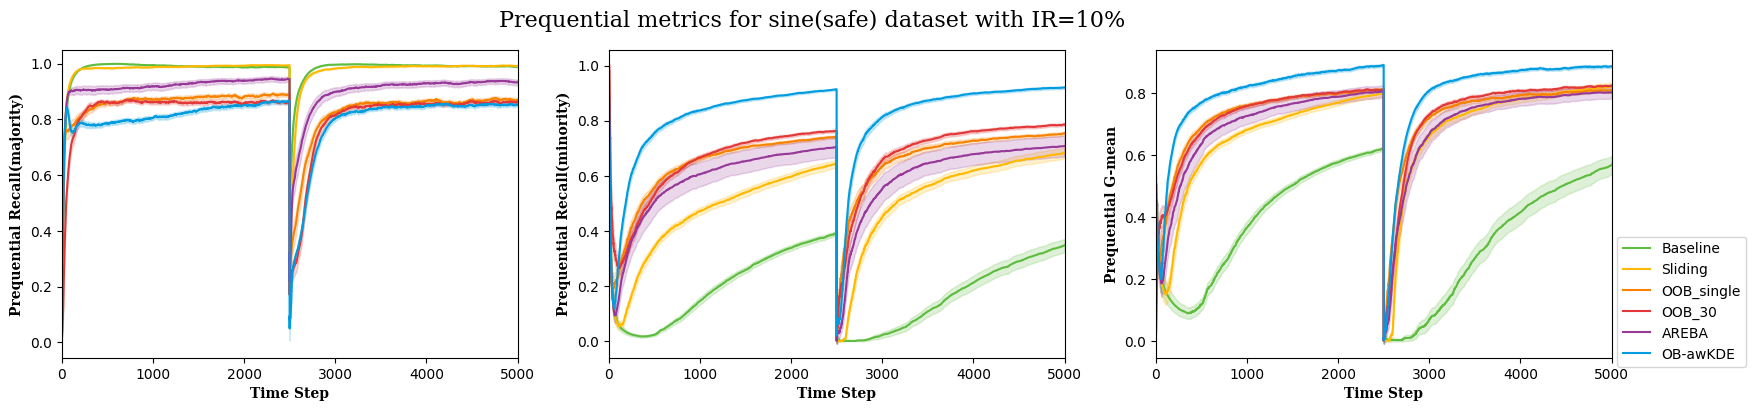

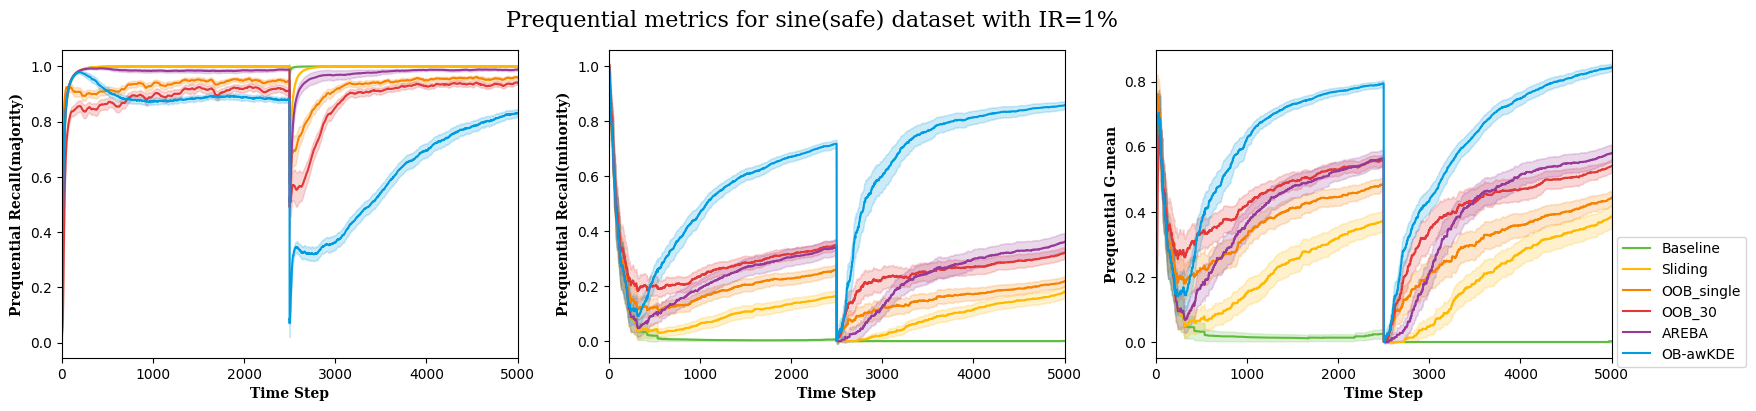

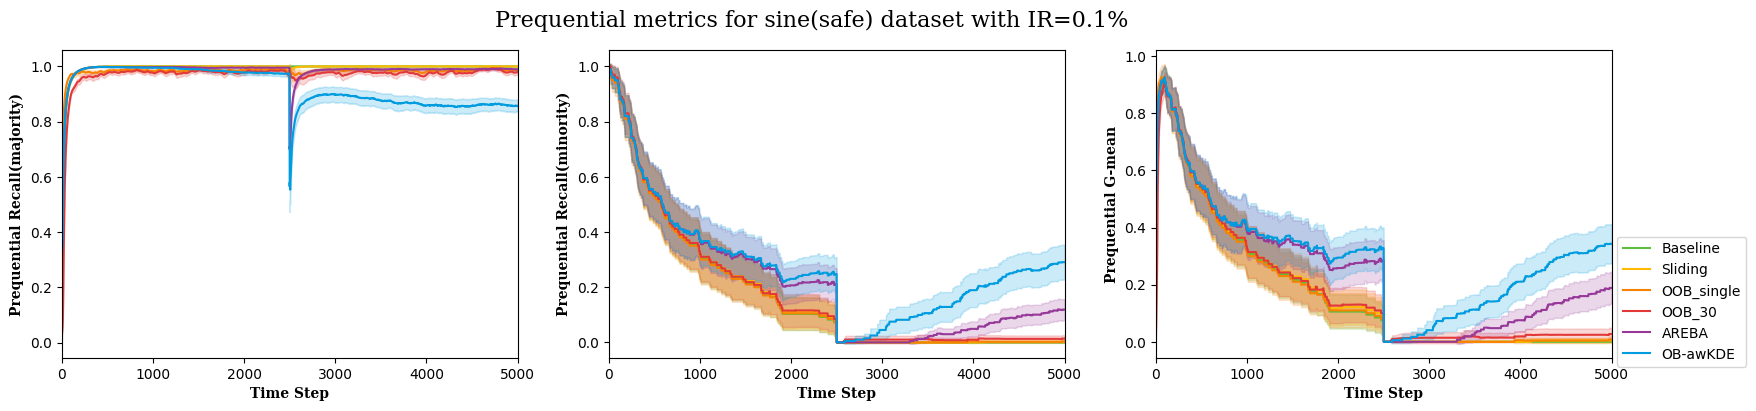

In [2]:
plot_dic = "<your path>/res/sine/safe/10"
plot_res(plot_dic)
plot_dic = "<your path>/res/sine/safe/1"
plot_res(plot_dic)
plot_dic = "<your path>/res/sine/safe/0"
plot_res(plot_dic)  

### borderline

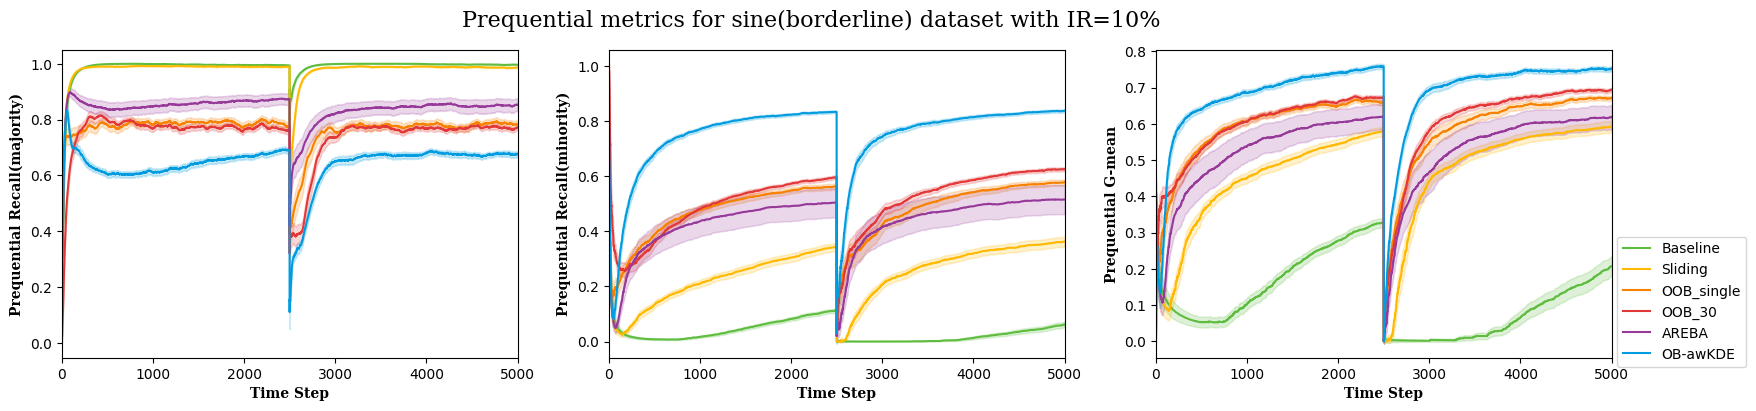

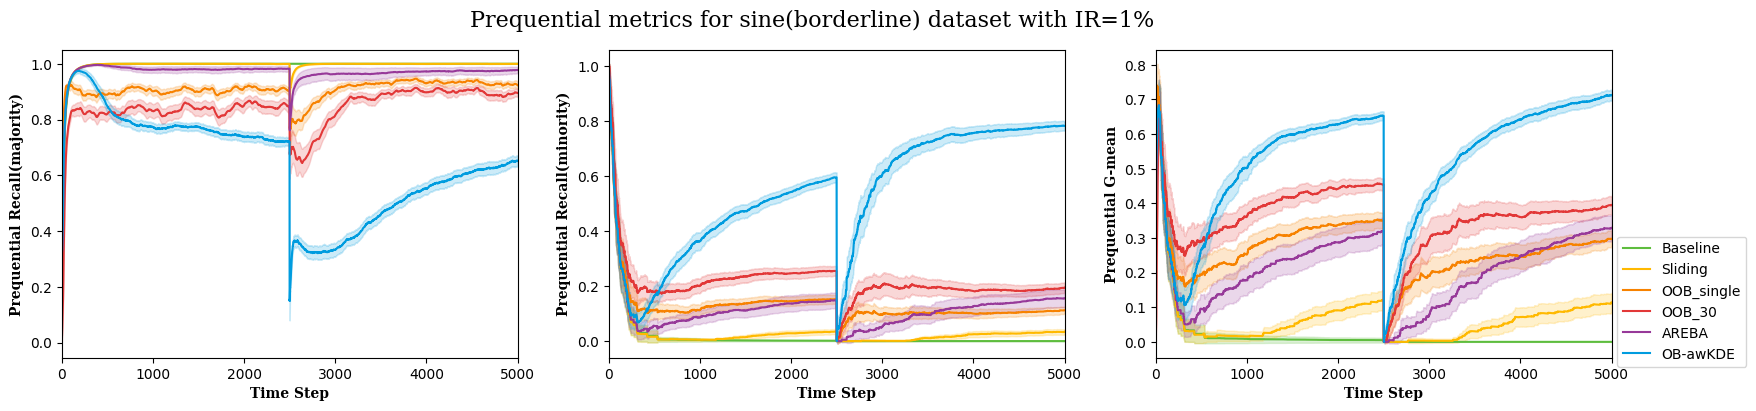

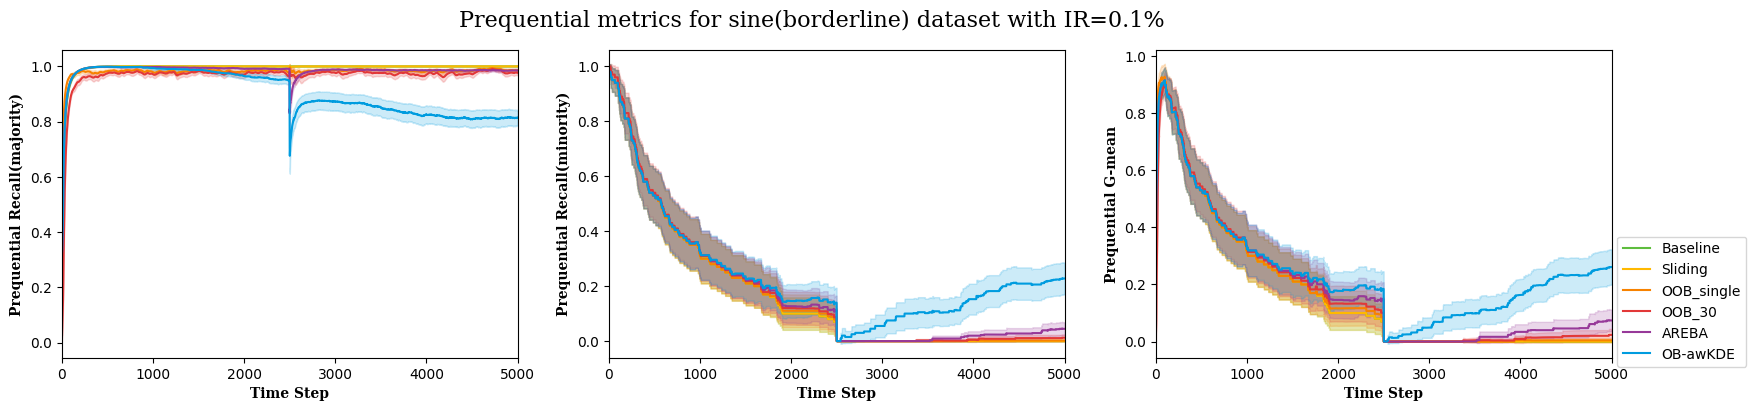

In [3]:
plot_dic = "<your path>/res/sine/borderline/10"
plot_res(plot_dic)
plot_dic = "<your path>/res/sine/borderline/1"
plot_res(plot_dic)
plot_dic = "<your path>/res/sine/borderline/0"
plot_res(plot_dic)  

### noise

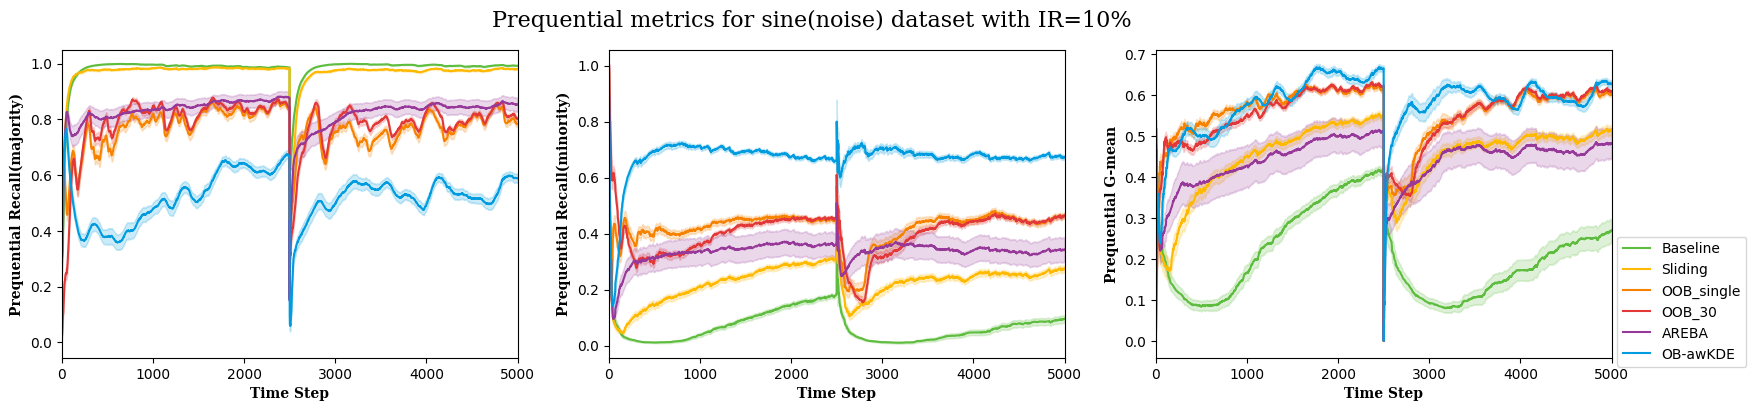

In [4]:
plot_dic = "<your path>/res/sine/noise/10"
plot_res(plot_dic)

## Circle
### safe

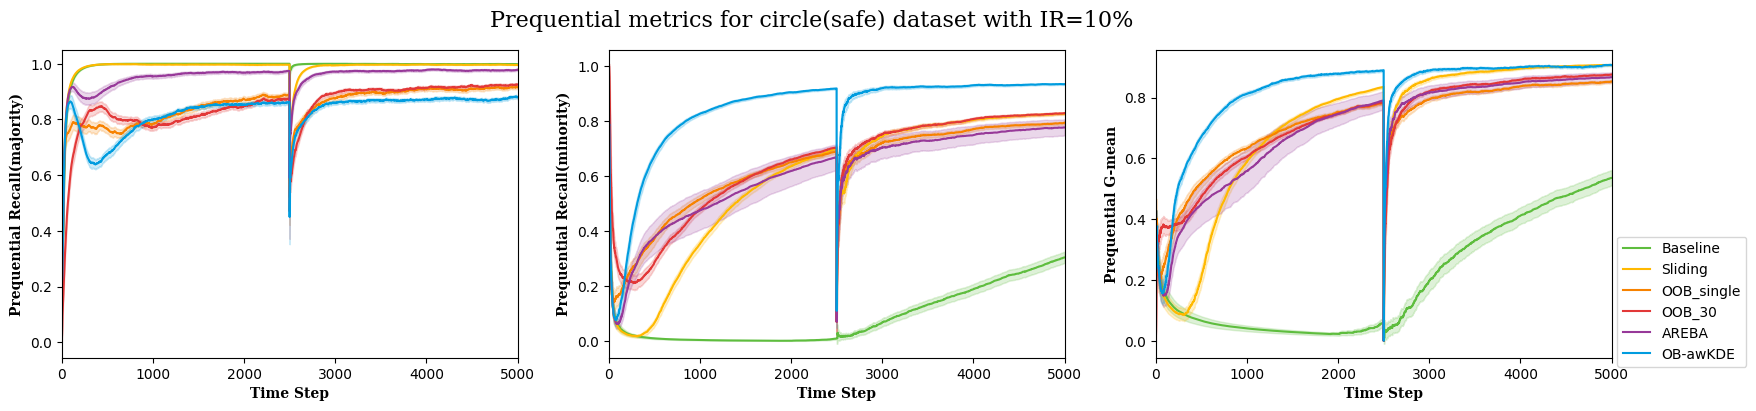

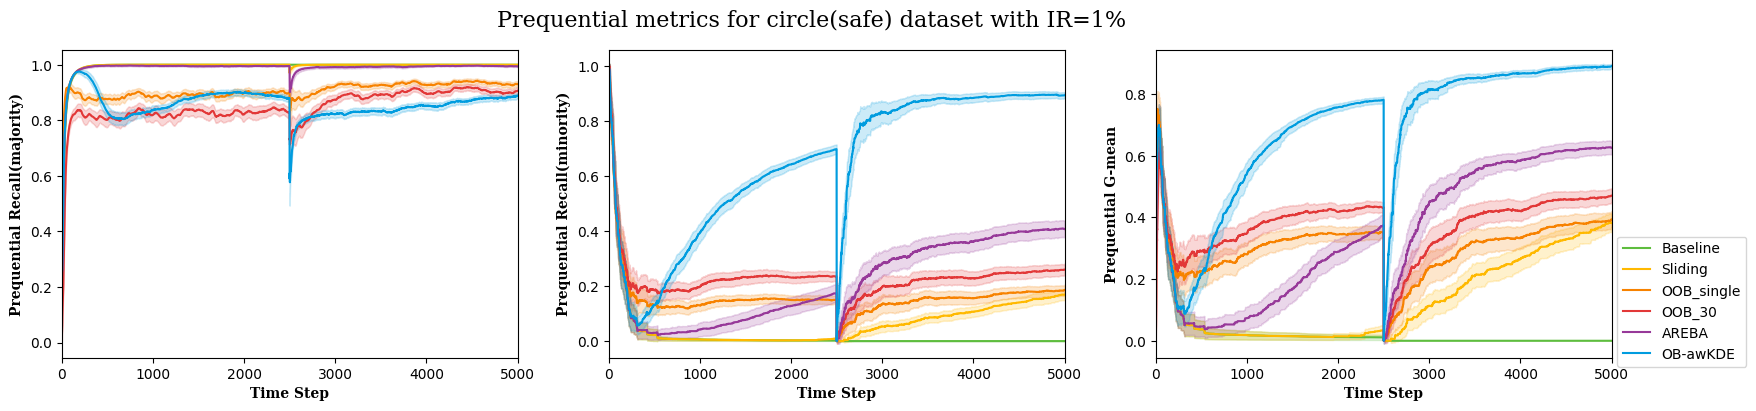

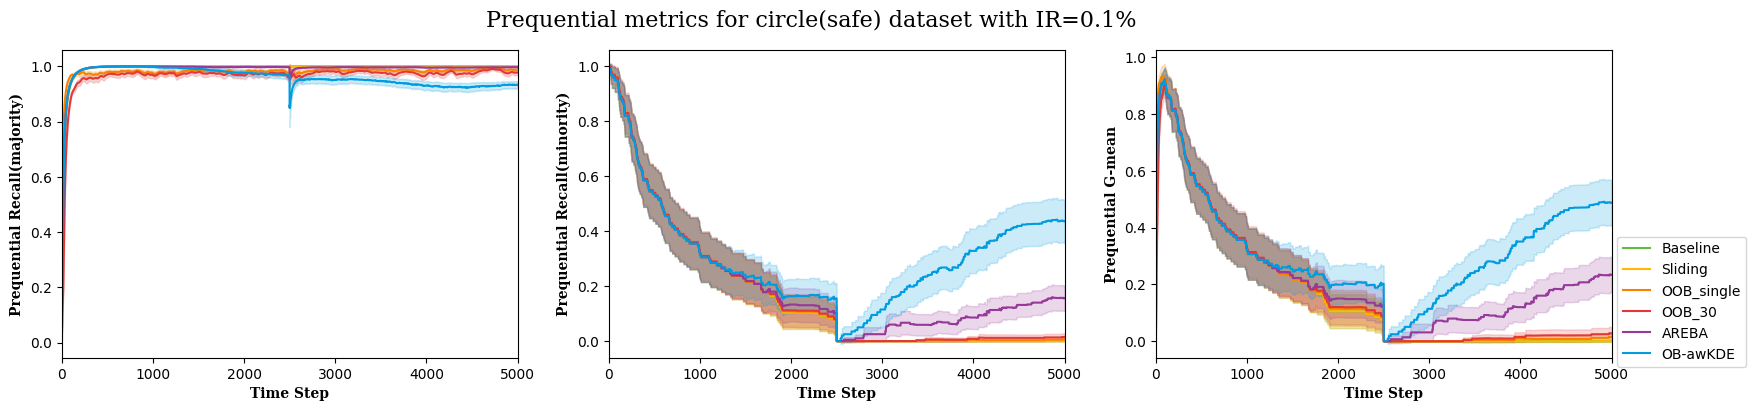

In [5]:
plot_dic = "<your path>/res/circle/safe/10"
plot_res(plot_dic)
plot_dic = "<your path>/res/circle/safe/1"
plot_res(plot_dic)
plot_dic = "<your path>/res/circle/safe/0"
plot_res(plot_dic)  

### borderline

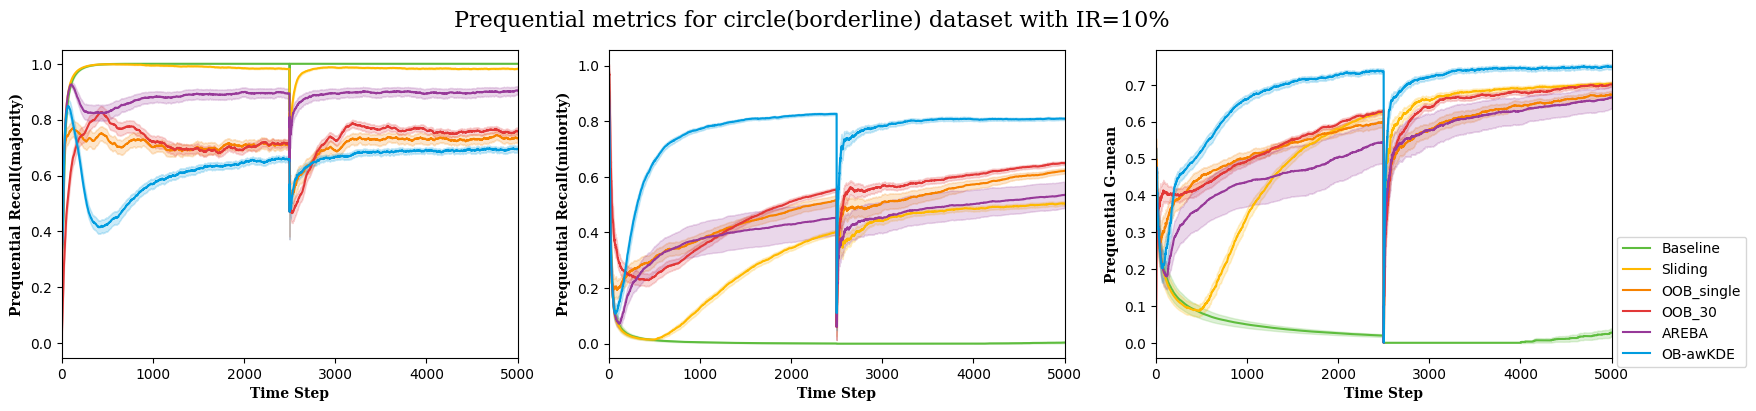

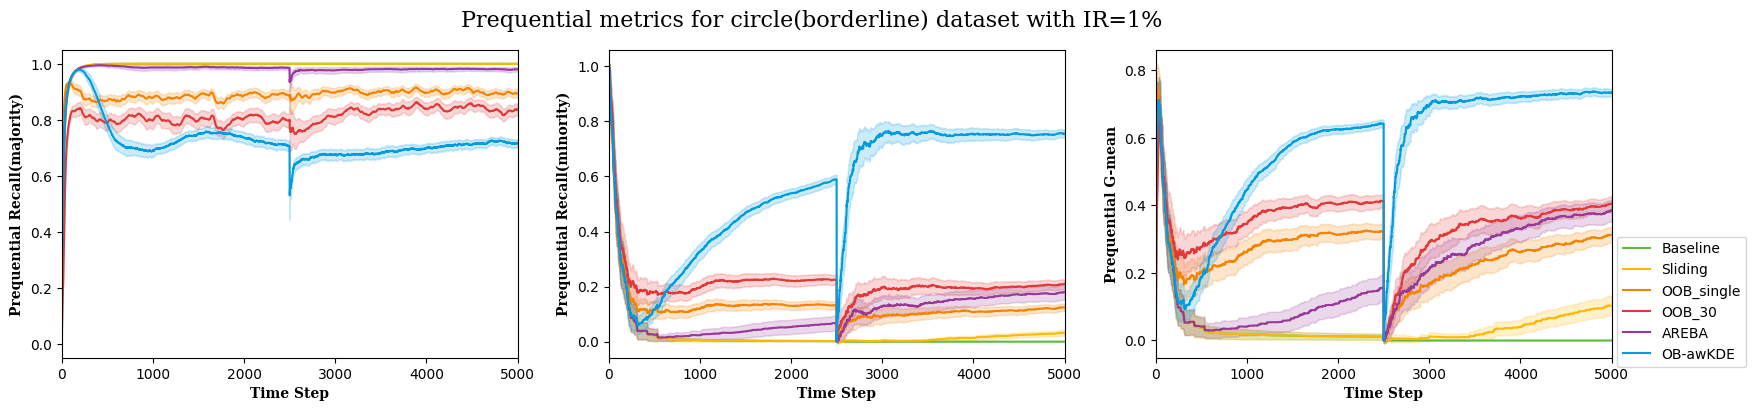

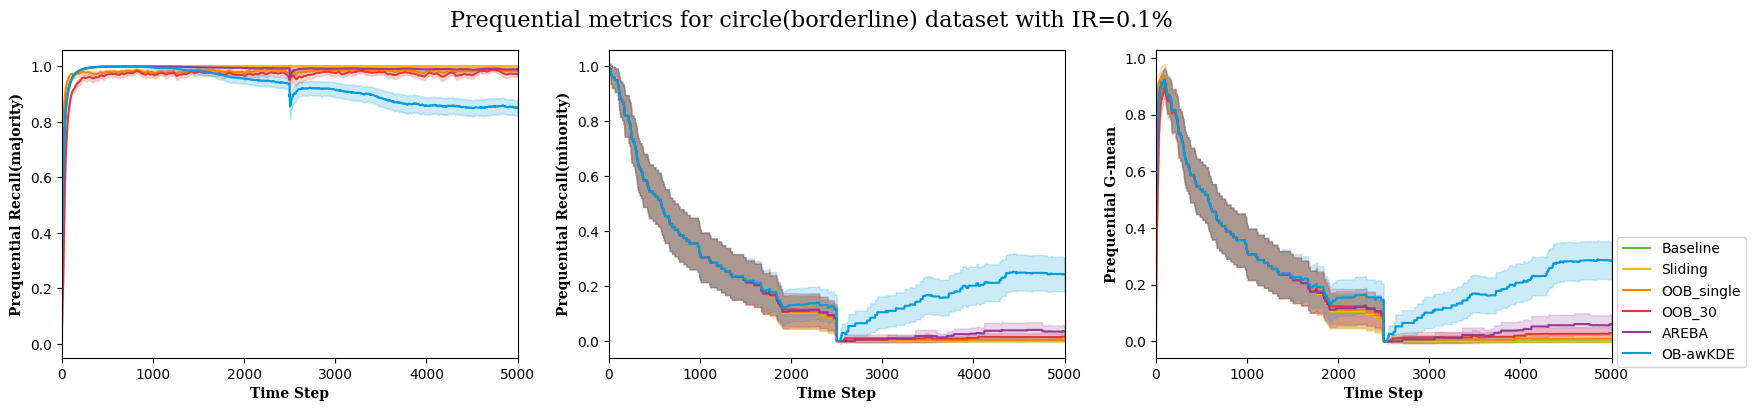

In [6]:
plot_dic = "<your path>/res/circle/borderline/10"
plot_res(plot_dic)
plot_dic = "<your path>/res/circle/borderline/1"
plot_res(plot_dic)
plot_dic = "<your path>/res/circle/borderline/0"
plot_res(plot_dic)  

### noise

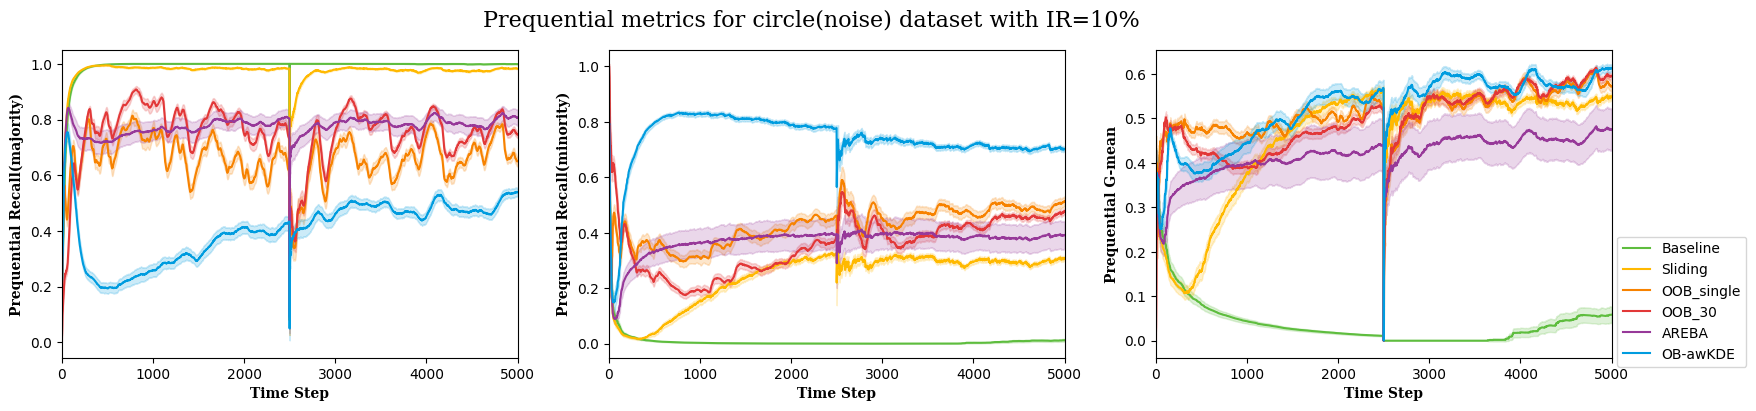

In [7]:
plot_dic = "<your path>/res/circle/noise/10"
plot_res(plot_dic)

## SEA
### safe

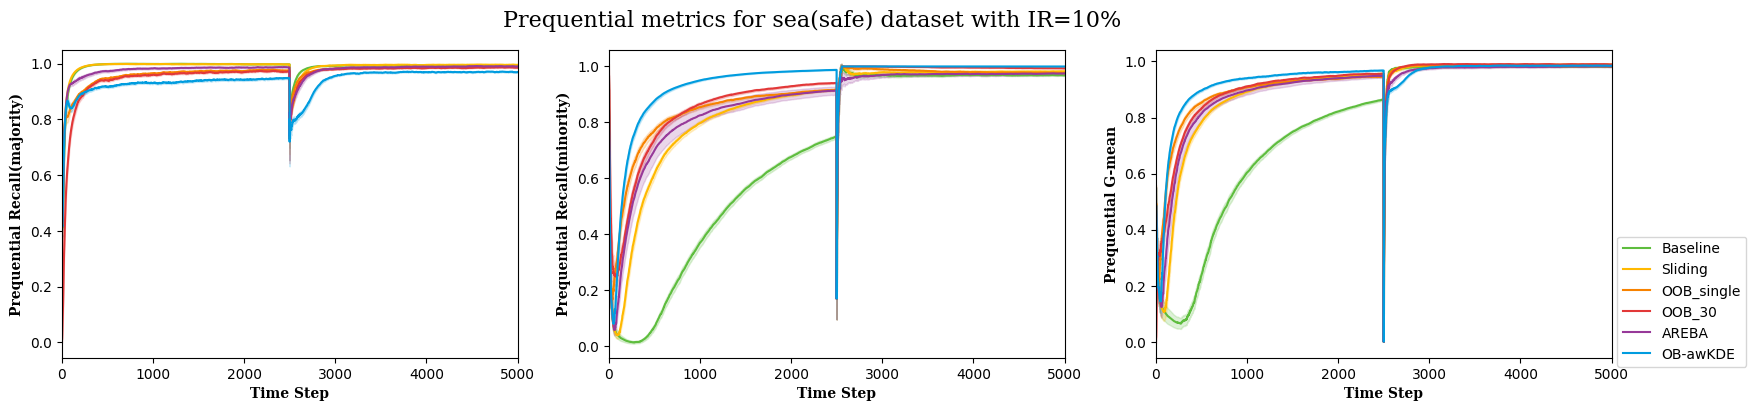

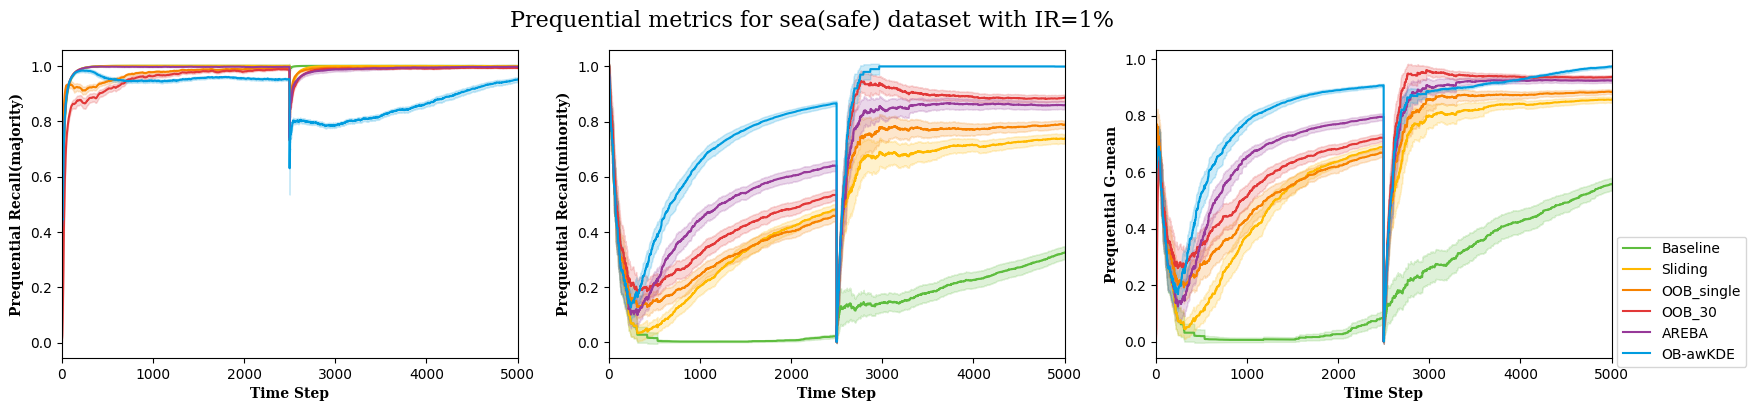

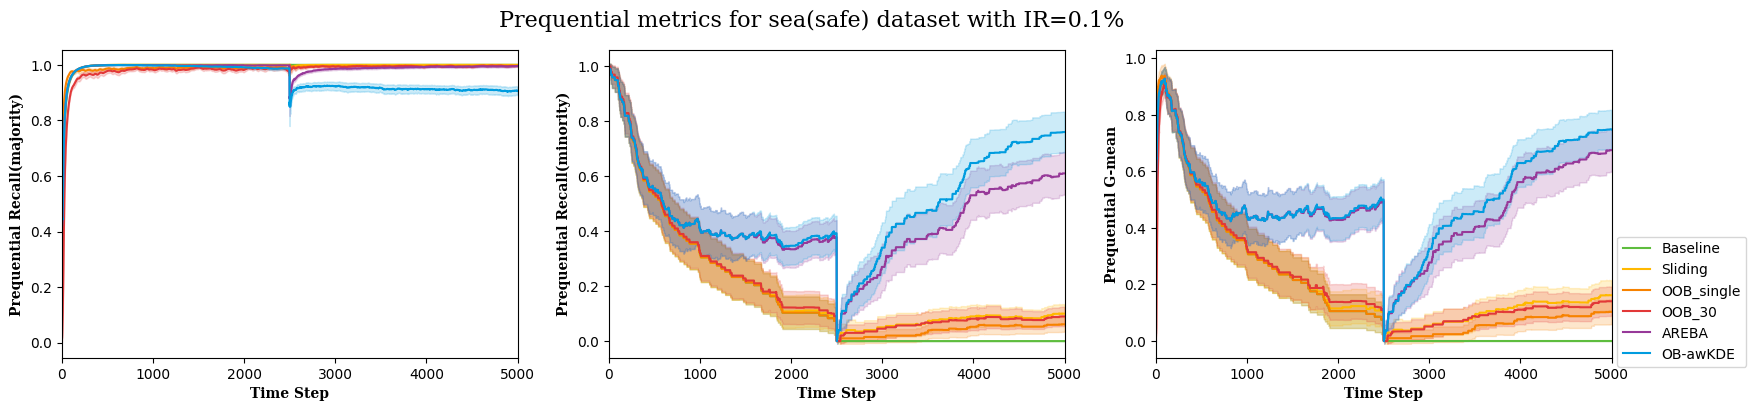

In [8]:
plot_dic = "<your path>/res/sea/safe/10"
plot_res(plot_dic)
plot_dic = "<your path>/res/sea/safe/1"
plot_res(plot_dic)
plot_dic = "<your path>/res/sea/safe/0"
plot_res(plot_dic)  

### borderline

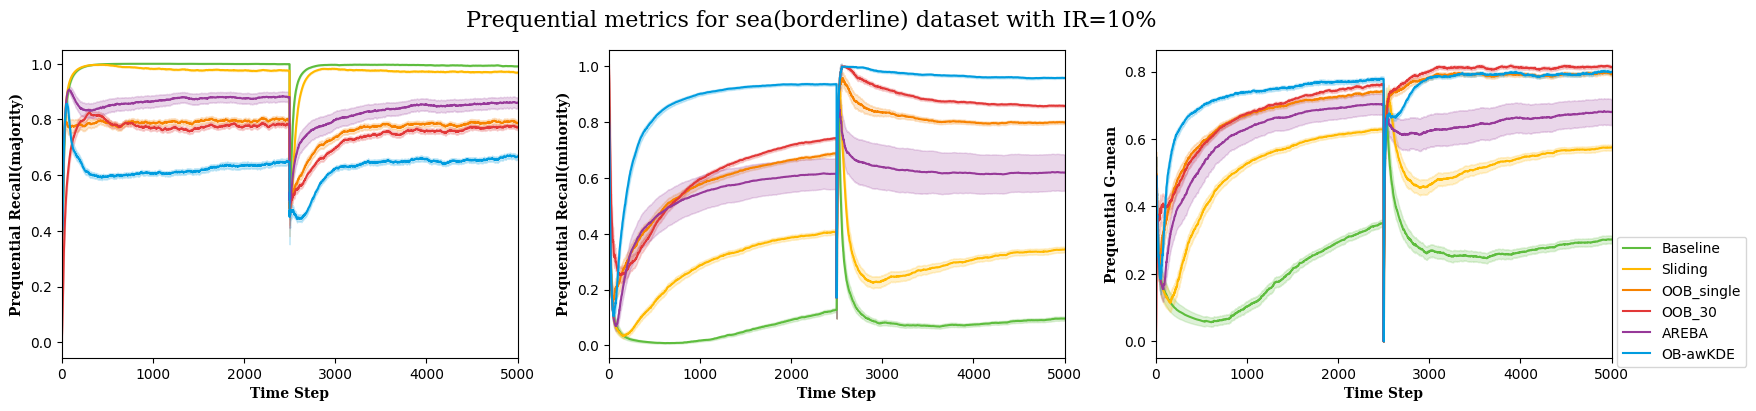

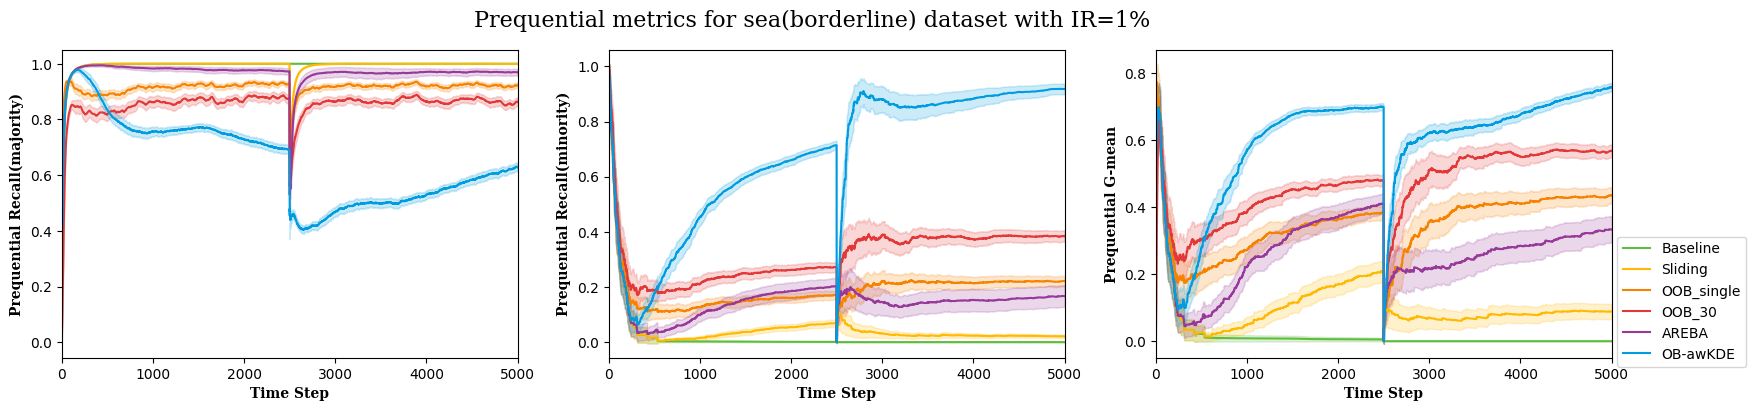

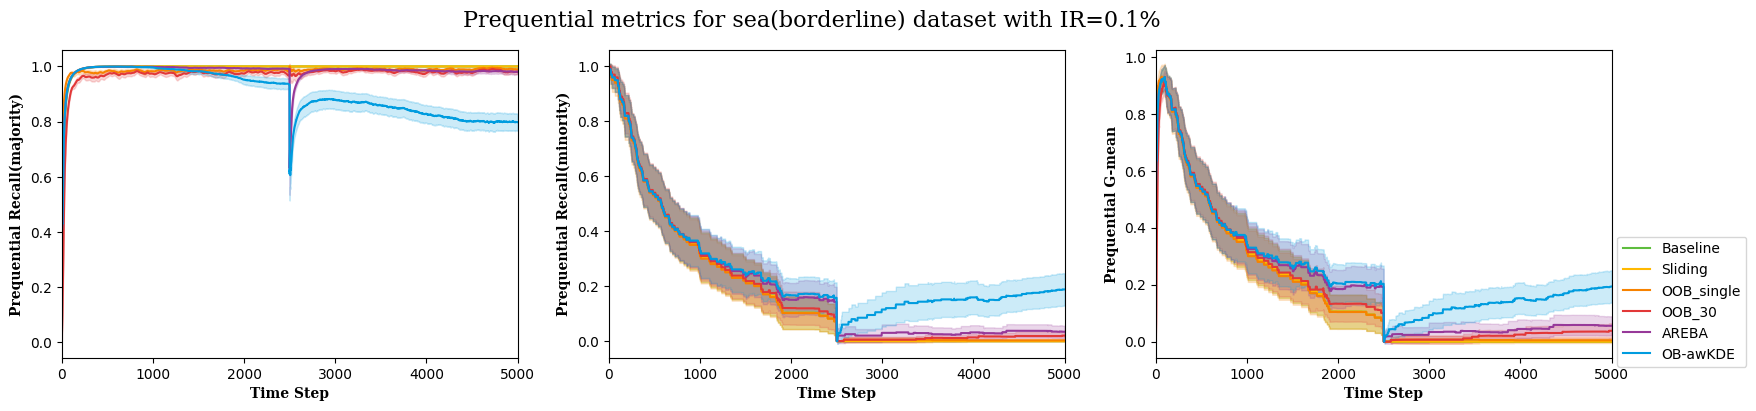

In [9]:
plot_dic = "<your path>/res/sea/borderline/10"
plot_res(plot_dic)
plot_dic = "<your path>/res/sea/borderline/1"
plot_res(plot_dic)
plot_dic = "<your path>/res/sea/borderline/0"
plot_res(plot_dic)  

### noise

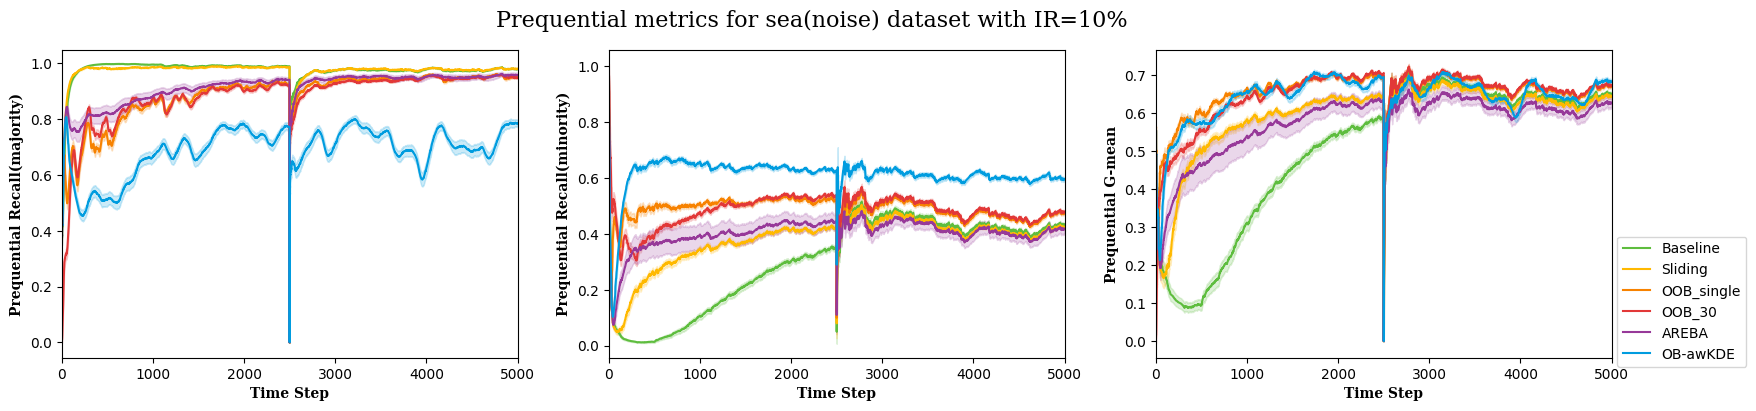

In [10]:
plot_dic = "<your path>/res/sea/noise/10"
plot_res(plot_dic)